In [ ]:
%pip install matplotlib scipy pandas tensorflow xgboost scikit-learn json pickle

  Using cached matplotlib-3.7.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.2 MB)
  Using cached pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
  Using cached xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl (297.1 MB)


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import random as rnd
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]=""

In [3]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras import layers, models

2024-06-18 15:42:02.836806: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 15:42:03.812586: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-06-18 15:42:03.812697: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-06-18 15:42:03.812712: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [4]:
tf.config.list_physical_devices()

2024-06-18 15:42:04.924610: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-06-18 15:42:04.924653: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: hires-lambda1.cs.unc.edu
2024-06-18 15:42:04.924664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: hires-lambda1.cs.unc.edu
2024-06-18 15:42:04.924745: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.104.12
2024-06-18 15:42:04.924781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.104.12
2024-06-18 15:42:04.924791: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 535.104.12


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
from xgboost import XGBClassifier
from scipy.linalg import null_space
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cross_decomposition import CCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [6]:
# from google.colab import drive
import pickle
import json
# drive.mount('/content/drive')

In [7]:
r_quad = 80 + np.sin(np.linspace(0, np.pi, 100)) * 40


all_samples = []
Y = []
for quads in range(6):
  thet_quad = np.linspace(0, np.pi/3, 100) + quads * np.pi/3
  mus = np.vstack([r_quad * np.sin(thet_quad), r_quad * np.cos(thet_quad)]).T
  samples = np.random.normal(size=(5*100*2)).reshape(5, 100, 2) * 13 * np.random.uniform(size=(5*100*2)).reshape(5, 100, 2) + \
              mus[None, :, :]
  all_samples.append(samples.reshape(-1, 2))

all_samples = np.concatenate(all_samples, axis=0)

Y += [1]*len(all_samples)

r_quad = 40 + np.sin(np.linspace(0, np.pi, 100)) * 25


all_samplesn = []
segs = 4
for quads in range(segs):
  thet_quad = np.linspace(0, np.pi/(segs/2), 100) + quads * np.pi/(segs/2) + np.pi/6
  mus = np.vstack([r_quad * np.sin(thet_quad), r_quad * np.cos(thet_quad)]).T
  samples = np.random.normal(size=(4*100*2)).reshape(4, 100, 2) * 9 * np.random.uniform(size=(4*100*2)).reshape(4, 100, 2) + \
              mus[None, :, :]
  all_samplesn.append(samples.reshape(-1, 2))

all_samplesn = np.concatenate(all_samplesn, axis=0)
Y += [0]*len(all_samplesn)


In [8]:
all_samplesn.shape

(1600, 2)

In [9]:
X = np.concatenate([all_samples, all_samplesn], axis=0)
Y = np.array(Y)

In [10]:
r_quad = 65 + np.sin(np.linspace(0, np.pi, 100)) * 40


all_samples = []
t_Y = []
for quads in range(6):
  thet_quad = np.linspace(0, np.pi/3, 100) + quads * np.pi/3
  mus = np.vstack([r_quad * np.sin(thet_quad), r_quad * np.cos(thet_quad)]).T
  samples = np.random.normal(size=(5*100*2)).reshape(5, 100, 2) * 13 * np.random.uniform(size=(5*100*2)).reshape(5, 100, 2) + \
              mus[None, :, :]
  all_samples.append(samples.reshape(-1, 2))

all_samples = np.concatenate(all_samples, axis=0)

t_Y += [1]*len(all_samples)

r_quad = 55 + np.sin(np.linspace(0, np.pi, 100)) * 25


all_samplesn = []
segs = 4
for quads in range(segs):
  thet_quad = np.linspace(0, np.pi/(segs/2), 100) + quads * np.pi/(segs/2) + np.pi/6
  mus = np.vstack([r_quad * np.sin(thet_quad), r_quad * np.cos(thet_quad)]).T
  samples = np.random.normal(size=(4*100*2)).reshape(4, 100, 2) * 9 * np.random.uniform(size=(4*100*2)).reshape(4, 100, 2) + \
              mus[None, :, :]
  all_samplesn.append(samples.reshape(-1, 2))

all_samplesn = np.concatenate(all_samplesn, axis=0)
t_Y += [0]*len(all_samplesn)

In [11]:
all_samplesn.shape

(1600, 2)

In [12]:
test_X = np.concatenate([all_samples, all_samplesn], axis=0)
test_Y = np.array(t_Y)

In [13]:
test_X.shape, X.shape

((4600, 2), (4600, 2))

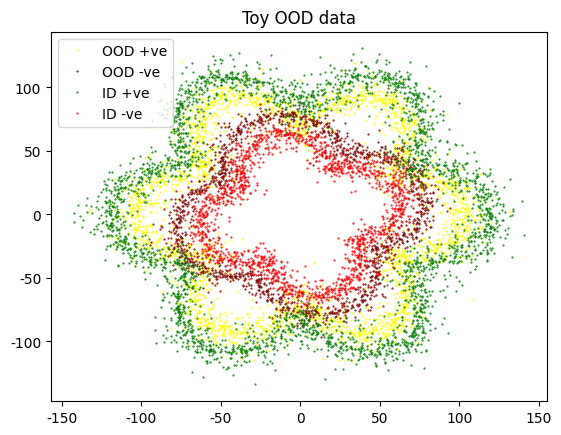

In [14]:
import matplotlib.pyplot as plt
plt.plot(test_X[:3000, 0], test_X[:3000, 1], 'o', color='yellow', ms=0.5, label="OOD +ve")
plt.plot(test_X[3000:, 0], test_X[3000:, 1], 'o', color='maroon', ms=0.5, label="OOD -ve")
plt.plot(X[:3000, 0], X[:3000, 1], 'o', color='green', ms=0.5, label="ID +ve")
plt.plot(X[3000:, 0], X[3000:, 1], 'o', color='red', ms=0.5, label="ID -ve")
x = [-150, -100, -50, 0, 50, 100, 150]
y = [-100, -50, 0, 50, 100]
# create an index for each tick position
xi = list(range(len(x)))
plt.xticks(x, x)
plt.yticks(y, y)
plt.title("Toy OOD data")
plt.legend(loc="upper left")
plt.savefig("toy-ood.png")
plt.show()

In [15]:
def project_and_filter(X, dir, percentile=75):
  projs = np.dot(X, dir)
  thresh = np.percentile(projs, 100 - percentile)
  filtered_idxs = projs >= thresh
  return X[filtered_idxs], filtered_idxs

In [16]:
X_sub, X_ids = project_and_filter(X, np.array([1, 0]), 40)
Y_sub = Y[X_ids]

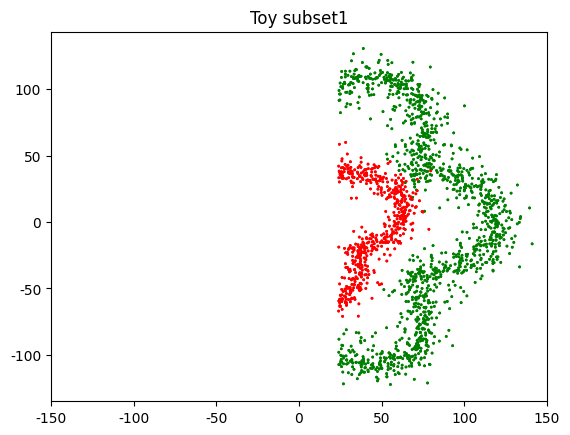

In [17]:
# import matplotlib.pyplot as plt
plt.scatter(X_sub[:, 0], X_sub[:, 1], c=[['red', 'green'][int(y)] for y in Y_sub], s=1)
plt.scatter(X_sub[:, 0], X_sub[:, 1], c=[['red', 'green'][int(y)] for y in Y_sub], s=1)
x = [-150, -100, -50, 0, 50, 100, 150]
y = [-100, -50, 0, 50, 100]
# create an index for each tick position
xi = list(range(len(x)))
plt.xticks(x, x)
plt.yticks(y, y)
plt.title("Toy subset1")
plt.savefig("toy-subs1.png")
plt.show()

In [18]:
plt.savefig("toy-subs.png")

<Figure size 640x480 with 0 Axes>

In [19]:
# standardize the data
mu_x = np.mean(X, 0, keepdims=True)
#sigma_x = np.std(X, 0, keepdims=True)
sigma_x = np.ones_like(mu_x)
X = (X-mu_x)/sigma_x

In [20]:
print(X.shape)
print(Y.shape)

(4600, 2)
(4600,)


In [21]:
class RandFeats:
  # def __init__(self, sigma_rot, d, D=128):
  def __init__(self, sigma_rot, d, D=10):

    self.sigmas = [sigma_rot/4, sigma_rot/2, sigma_rot, sigma_rot*2, sigma_rot*4]
    self.D = D
    self.Ws = []
    for sigma in self.sigmas:
      self.Ws.append(np.float32(np.random.randn(d, D)/sigma))
    self.Ws = np.stack(self.Ws, 0)

  def get_features(self, x_in):
    # phis = []
    # TODO: vectorize
    # for W in Ws:
    #   XW = np.matmul(x_in, W)
    #   phis.append(
    #     np.concatenate([np.sin(XW), np.cos(XW)], -1))
    # return np.concatenate(phis, -1)
    phis = tf.matmul(x_in, self.Ws)  # k x N x D
    phis = tf.transpose(phis, [1, 2, 0])  # N x D x k
    phis = tf.concat((tf.sin(phis), tf.cos(phis)), 1)
    return tf.reshape(phis, [x_in.shape[0], -1])

  def __call__(self, x_in):
    return self.get_features(x_in)

# def define_rand_feats(ndata_feats, nrand_feats=1000, gamma=1.0):
def define_rand_feats(X, xD):
  """
  Args:
    ndata_feats: scalar value of total number of data features
    nrand_feats: scalar value of total number of desired random features
    gamma: Float, scale of frequencies

  Returns:
    Ws: ndata_feats x nrand_feats weight matrix
    bs: 1 x nrand_feats bias vector
  """
  tf.random.set_seed(123129) # For reproducibility
  from scipy.spatial import distance
  rprm = np.random.permutation(X.shape[0])
  ds = distance.cdist(np.array(X)[rprm[:100], :], np.array(X)[rprm[100:], :])
  sigma_rot = np.mean(np.sort(ds)[:, 5])
  model = RandFeats(sigma_rot, X.shape[1], X.shape[1]*xD)

  # Ws = gamma*tf.random.normal((ndata_feats, nrand_feats))
  # bs = 2.0*np.pi*tf.random.uniform((1,nrand_feats))
  # return Ws, bs
  return model

In [22]:
Dx = [2, 4, 6, 8, 10, 16]

In [23]:
def get_rand_feats(X, model):
  """
  Args:
    X: N x d matrix of input features
    Ws: ndata_feats x nrand_feats weight matrix
    bs: 1 x nrand_feats bias vector

  Returns:
    Phis: N x D matrix of random features
  """
  # XWs = tf.matmul(X, Ws)
  # return tf.cos(XWs+bs)
  return model(X)

In [24]:
def linear_coefs(X, X_ids, Y):
  """
  Args:
    X: N x d matrix of input features
    Y: N x 1 matrix (column vector) of output response

  Returns:
    Beta: d x 1 matrix of linear coefficients
  """
  # clf = LogisticRegression(random_state=0, solver='liblinear').fit(X, Y)
  clf = SVC(random_state=0, tol=1e-5, kernel='linear').fit(X, Y)
  support = (clf.support_, clf.n_support_)

  def get_supp(support):
      supps_, n_supps_ = support
      supps_0 = supps_[:n_supps_[0]]
      supps_1 = supps_[n_supps_[0]:]
      return X_ids[supps_0], X_ids[supps_1]

  support = get_supp(support)
    
  # clf = LogisticRegression(random_state=0).fit(X, Y)
  print(clf.score(X, Y))
  wgts = np.hstack((clf.intercept_[:,None], clf.coef_))
  # print(wgts.shape, clf.intercept_[:,None].shape, clf.coef_.shape)
  prd = (1 / (1 + np.exp(-np.concatenate([np.ones((X.shape[0], 1)), X], axis=-1) @ wgts.T)) > 0.5) *1.0
  # print(np.mean(prd[:, 0]==Y))
  return wgts, support
  # beta = tf.linalg.solve(tf.matmul(tf.transpose(X),X), tf.matmul(tf.transpose(X), Y[:, None]))
  # return beta

In [28]:
s, u, v = tf.linalg.svd(X)
pca_projs = v[:, :int(X.shape[-1]*1.0)]

In [29]:
pca_projs.shape

TensorShape([2, 2])

In [25]:
def get_models(X, Y, dirs, model, percentile=75):
  #X_subsets = []
  #data_ids = []
  #Y_subsets = []
  betas = []
  supps = []
  i = 0
  for dir in dirs: # TODO: Vectorize
    if i % 25 == 0: print(f"Step {i}")
    X_sub, X_ids = project_and_filter(X, dir, percentile)
    Y_sub = Y[X_ids]
    print(X.shape, X_ids.shape)
    beta, supp = linear_coefs(get_rand_feats(X_sub, model), np.argwhere(X_ids), Y_sub)
    # beta = linear_coefs(X_sub, Y_sub)

    #X_subsets.append(X_sub)
    #data_ids.append(X_ids)
    #Y_subsets.append(Y_sub)
    betas.append(beta)
    supps.append(supp)
    i += 1
    if i == len(dirs) - 1: print(f"Done")

  # cant do this because subsets of variable sizes
  #X_subsets = np.array(X_subsets)
  #data_ids = np.array(data_ids)
  #Y_subsets = np.array(Y_subsets)
  betas = np.array(betas)

  return betas, supps
  #return X_subsets, data_ids, Y_subsets, betas

In [33]:
np.random.seed(74)
model = define_rand_feats(X, Dx[2])

# N = 2**11    # ~ 8k
N = 100    # ~ 8k
d = X.shape[-1]
random_dirs = np.random.randn(N, d) # Maybe do the random directions in the random feature space??? Feel like that makes more sense
# Some other strategies:
### Completely random
### Maybe draw random directions, but also some one hot directions (essentially taking the highest/lowest values of certain features as a subset)
### Second idea in theory would increase variance between subsets - thinking similar instances have similar feature values
random_dirs = random_dirs / np.linalg.norm(random_dirs, axis=1, keepdims=True)

#X_subsets, data_ids, Y_subsets, betas = get_models(X, Y, random_dirs, Ws, bs, percentile=33)
betas, supps = get_models(X, Y, random_dirs, model, percentile=25)

Step 0
(4600, 2) (4600,)
0.9982608695652174
(4600, 2) (4600,)
0.9982608695652174
(4600, 2) (4600,)
0.9991304347826087
(4600, 2) (4600,)
0.9982608695652174
(4600, 2) (4600,)
0.9973913043478261
(4600, 2) (4600,)
0.9982608695652174
(4600, 2) (4600,)
0.9982608695652174
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
0.9982608695652174
(4600, 2) (4600,)
0.9982608695652174
(4600, 2) (4600,)
0.9991304347826087
(4600, 2) (4600,)
0.9991304347826087
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
0.9982608695652174
(4600, 2) (4600,)
0.9973913043478261
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
0.9991304347826087
(4600, 2) (4600,)
0.9991304347826087
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
0.9982608695652174
(4600, 2) (4600,)
0.9982608695652174
(4600, 2) (4600,)
0.9982608695652174
Step 25
(4600, 2) (4600,)
0.9991304347826087
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
0.9982608695652174
(4600, 2) (4600,)
0.9956521739130435
(4600, 2) (4600,)
0.998260869565

In [56]:
def softmax(X, wgts):
  sd = (1 / (1 + np.exp(-np.concatenate([np.ones((X.shape[0], 1)), X], axis=-1) @ wgts.numpy().T)) > 0.5) *1.0
  return sd[:]

nclusters = [1, 2, 3, 4, 5, 6, 7, 8, 9]
random_dirs = []
betas, supps = [], []
iters = 100
max_rand_dirs = 1000
new_rand_dirs = np.random.randn(1, d)
num_rand_dirs = 0
for i in range(iters):
    if num_rand_dirs > max_rand_dirs:
        break
    new_rand_dirs = new_rand_dirs / np.linalg.norm(new_rand_dirs, axis=1, keepdims=True)
    new_rand_dirs = new_rand_dirs[np.random.choice(len(new_rand_dirs), size=min(len(new_rand_dirs), 100), replace=False, p=None)]
    random_dirs.append(new_rand_dirs)
    num_rand_dirs += len(new_rand_dirs)
    #print(new_rand_dirs.shape)
    print("New dirs: ", len(new_rand_dirs))
    
    _betas, _supps = get_models(X, Y, new_rand_dirs, model, percentile=20)
    betas.append(_betas)
    supps += _supps
    _new_rand_dirs = []
    for _dir, _beta in zip(new_rand_dirs, _betas):
        for ix, prcnt in enumerate(range(25, 100, 20)):
            X_sub, X_ids = project_and_filter(X, _dir, prcnt)
            Y_sub = Y[X_ids]
            _beta = tf.squeeze(_beta)
            _dir = tf.constant(_dir)
            prd = softmax(get_rand_feats(X_sub, model), _beta)

            incrct = np.where(prd != Y_sub)
            # print(len(prd), len(Y_sub), get_rand_feats(X_sub@pca_projs, model).shape, _beta.shape, prd)
            incrct_X = get_rand_feats(X_sub[incrct], model)
            if len(incrct_X) < 20:
                continue
            kmeans = KMeans(n_clusters=nclusters[ix], random_state=0, n_init="auto").fit(incrct_X)
            mp = kmeans.cluster_centers_
            # print(mp)
            neigh = NearestNeighbors(n_neighbors=5)
            neigh.fit(incrct_X)

            n_ind = neigh.kneighbors(mp, 3, return_distance=False)
            nngr_id = [_n_ind[np.random.choice(3, 1)[0]] for _n_ind in n_ind]
            _new_rand_dirs.append(X_sub[incrct][nngr_id] + np.random.randn(*X_sub[incrct][nngr_id].shape)*0.1)
    new_rand_dirs = np.concatenate(_new_rand_dirs, axis=0)
    print("Total dirs: ", num_rand_dirs)

betas = np.concatenate(betas, axis=0)
random_dirs = np.concatenate(random_dirs, axis=0)

New dirs:  1
Step 0
(4600, 2) (4600,)
0.9989130434782608
Total dirs:  1
New dirs:  10
Step 0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
Done
(4600, 2) (4600,)
1.0
Total dirs:  11
New dirs:  97
Step 0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
0.9989130434782608
(4600, 2) (4600,)
0.9989130434782608
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
0.9989130434782608
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
0.9989130434782608
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
0.9989130434782608
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
0.9989130434782608
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
(4600, 2) (4600,)
1.0
Step 

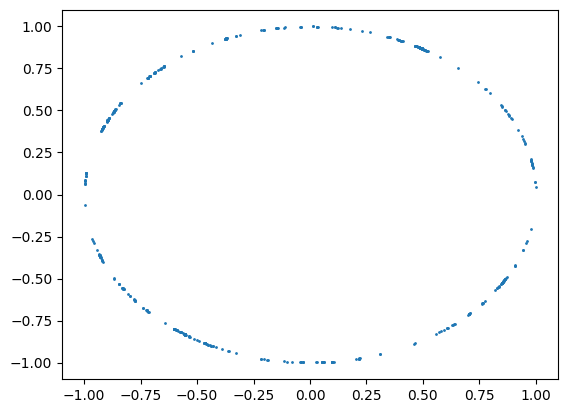

In [54]:
plt.scatter(random_dirs[:, 0], random_dirs[:, 1], s=1)

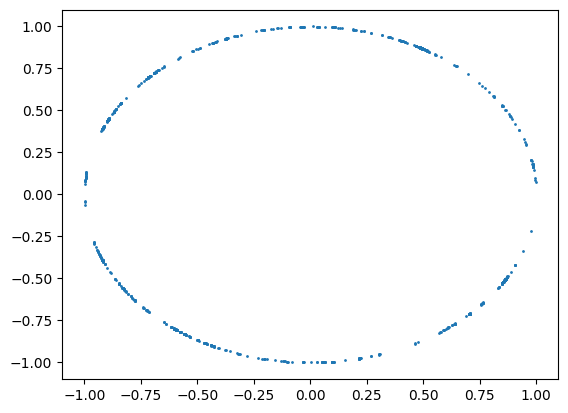

In [57]:
plt.scatter(random_dirs[:, 0], random_dirs[:, 1], s=1)

In [37]:
random_dirs.shape

(51, 2)

In [34]:
random_dirs.shape

(51, 2)

In [32]:
betas.shape

(2, 1, 121)

In [ ]:
def softmax(X, wgts):
  sd = (1 / (1 + np.exp(-np.concatenate([np.ones((X.shape[0], 1)), X], axis=-1) @ wgts.T)) > 0.5) *1.0
  return sd[:]

external_X = tf.cast(test_X, tf.float32)
external_Y = test_Y
external_X = (external_X-mu_x)/sigma_x
X_sub, X_ids = project_and_filter(external_X, np.array([[1, 0.0], [0.6, 0.8]])[0], 80)
Y_sub = external_Y[X_ids]
prd = softmax(get_rand_feats(X_sub, model), betas[0])

In [3]:
clr = [['red', 'pink'], ['pink', 'green']]
plt.scatter(X_sub[:, 0], X_sub[:, 1], c=[clr[int(tru)][int(prd)] for tru, prd in zip(Y_sub, prd)], s=1)
plt.scatter(X_sub[:, 0], X_sub[:, 1], c=[clr[int(tru)][int(prd)] for tru, prd in zip(Y_sub, prd)], s=1)
x = [-150, -100, -50, 0, 50, 100, 150]
y = [-100, -50, 0, 50, 100]
# create an index for each tick position
xi = list(range(len(x)))
plt.xticks(x, x)
plt.yticks(y, y)
plt.title("Toy sample1")
# plt.title("Toy sample2")
plt.savefig("toy-samp1.png")
# plt.savefig("toy-samp2.png")
plt.show()

NameError: name 'plt' is not defined

In [34]:
np.save('toy-random_dirs-svm1.npy', random_dirs)
np.save('toy-betas-svm1.npy', betas)
np.save('toy-Ws-svm1.npy', model.Ws)
np.save('toy-pca-svm1.npy', pca_projs)

In [35]:
import pickle
with open("supps.npy", "wb") as fp:
    pickle.dump(supps, fp)
# with open("supps.npy", "rb") as fp:
#     supps_b = pickle.load(fp)

In [28]:
random_dirs = tf.constant(np.load('./toy-random_dirs-svm.npy'))
betas = tf.squeeze(tf.constant(np.load('./toy-betas-svm.npy')))
model = define_rand_feats(X, Dx[2])
model.Ws = tf.constant(np.load('./toy-Ws-svm.npy'))

In [32]:
model.Ws.dtype

dtype('float32')

In [36]:
betas = tf.squeeze(betas)
print(betas.shape)
random_dirs = tf.constant(random_dirs)
print(random_dirs.shape)

(100, 121)
(100, 2)


In [24]:
var = tf.math.reduce_variance(betas, axis=0)
mean_var = tf.reduce_mean(var)
print(mean_var)

tf.Tensor(0.05575754791556863, shape=(), dtype=float64)


In [31]:
sample = 100
def softmax(X, wgts):
  sd = (1 / (1 + np.exp(-np.concatenate([np.ones((X.shape[0], 1)), X], axis=-1) @ wgts.numpy().T)) > 0.5) *1.0
  return sd[:]

X_sub, X_ids = project_and_filter(X, random_dirs[sample], 75)
Y_sub = Y[X_ids]
prd = softmax(get_rand_feats(tf.cast(X_sub, dtype=tf.float32), model), betas[sample])

np.mean(prd == Y_sub), random_dirs[sample]

(0.984927536231884,
 <tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 0.75872289, -0.65141352])>)

In [32]:
supps_0, supps_1 = supps_b[sample]
supps_0.shape, supps_1

((125, 1),
 array([[   0],
        [   1],
        [  10],
        [  12],
        [  25],
        [  50],
        [ 104],
        [ 108],
        [ 120],
        [ 122],
        [ 180],
        [ 188],
        [ 193],
        [ 236],
        [ 298],
        [ 300],
        [ 314],
        [ 318],
        [ 323],
        [ 324],
        [ 355],
        [ 360],
        [ 362],
        [ 396],
        [ 398],
        [ 400],
        [ 402],
        [ 403],
        [ 426],
        [ 428],
        [ 434],
        [ 485],
        [ 497],
        [ 499],
        [ 501],
        [ 506],
        [ 507],
        [ 518],
        [ 610],
        [ 701],
        [ 704],
        [ 705],
        [ 798],
        [ 802],
        [ 803],
        [ 810],
        [ 812],
        [ 896],
        [ 903],
        [ 904],
        [1078],
        [1100],
        [1172],
        [1174],
        [1193],
        [1195],
        [1199],
        [1284],
        [1294],
        [1295],
        [1296],
        [1298

In [33]:
suppvs_0 = X[supps_0.reshape((-1,))]
suppvs_1 = X[supps_1.reshape((-1,))]
y_supp_0 = Y[supps_0.reshape((-1,))]
y_supp_1 = Y[supps_1.reshape((-1,))]
suppvs_0

array([[ 2.18245135e+01,  3.48628287e+01],
       [ 5.68769311e+01,  3.67435749e+01],
       [ 5.62513178e+01,  1.89976487e+01],
       [ 5.79288789e+01,  1.72881291e+01],
       [ 6.87885351e+01,  1.05878547e+01],
       [ 5.29313940e+01, -4.67924586e-02],
       [ 5.29552713e+01, -7.88894758e+00],
       [ 1.61140382e+01,  3.23341687e+01],
       [ 4.34010769e+01,  4.21174524e+01],
       [ 4.61943646e+01,  3.33616180e+01],
       [ 6.07875426e+01,  2.49044359e+01],
       [ 5.61949271e+01,  2.39086997e+01],
       [ 6.04730125e+01,  2.22924366e+01],
       [ 6.27723076e+01,  1.72964024e+01],
       [ 6.67398810e+01,  1.39232370e+01],
       [ 6.25319552e+01,  2.03780437e+00],
       [ 6.10762378e+01,  6.92581866e-01],
       [ 6.32705942e+01, -7.92294887e+00],
       [ 6.77171852e+01, -2.78832853e+00],
       [ 5.49142250e+01, -1.08799655e+01],
       [ 5.24112187e+01,  3.35848216e+01],
       [ 6.17350156e+01,  3.92770811e+01],
       [ 6.18425284e+01,  2.27206200e+01],
       [ 6.

In [34]:
suppvs_1.shape

(126, 2)

In [35]:
def get_margin(X, wgts):
  sd = (np.concatenate([np.ones((X.shape[0], 1)), X], axis=-1) @ wgts.numpy().T) * 1.0
  return sd[:]

def loss_2(labels, margins):
    l = 2*labels - 1
    return tf.reduce_sum(tf.reduce_mean(tf.nn.relu(-margins * l), axis=0))

get_rand_feats(tf.cast(suppvs_0, dtype=tf.float32), model).shape, betas[sample].shape
print(get_margin(get_rand_feats(tf.cast(suppvs_0, dtype=tf.float32), model), betas[sample]), y_supp_0)
# loss_2 = tf.keras.losses.BinaryCrossentropy(from_logits=True)
print(loss_2(y_supp_0[:len(suppvs_0)], get_margin(get_rand_feats(tf.cast(suppvs_0, dtype=tf.float32), model), betas[sample]*3)))

[-2.11125803 -0.51723986 -2.96915018 -3.02650184 -1.66648433 -2.04817684
 -2.02473534 -1.58507266 -1.63294071 -1.95158367 -2.30544165 -2.26725578
 -2.55735763 -3.54290233 -2.82824422 -1.38010703 -1.01377259 -0.82877093
 -0.55346017 -1.14562073 -1.36399143  0.17726931 -2.48432658 -1.46485508
 -1.34426267 -0.99909804 -2.14006869 -1.15145962 -2.93191015 -2.0735221
 -1.06509931 -1.85653894 -0.61553617 -1.46967587 -1.24688965 -0.42957951
 -1.157147   -1.0204418  -0.98819395 -0.99640386 -1.2818944  -1.35345908
 -0.97536588 -1.17936862 -1.32369772 -1.15697499 -1.42497135 -1.78748443
 -1.45443937 -1.22490216 -0.91847727 -1.36431641 -1.00329497 -1.06719945
 -1.09390847 -1.13735314 -2.13250058 -2.18268563 -2.03805016 -1.6612138
 -1.46221612 -1.06497087 -1.59361047 -0.87147692 -1.18966378 -1.52391068
 -1.26273353 -1.50090045 -1.4752767  -1.26010664 -1.33587912 -1.24254793
 -2.26936086 -2.03114378 -1.12378909 -1.71503449 -1.27734228 -2.76845226
 -1.97875603 -1.63258257 -1.31607115 -1.4264986  -1.3

In [36]:
get_rand_feats(tf.cast(suppvs_0, dtype=tf.float32), model).shape, betas[sample].shape

(TensorShape([125, 120]), TensorShape([121]))

In [37]:
tf.cast(suppvs_0, dtype=tf.float32).shape

TensorShape([125, 2])

In [38]:
y_supp_1[:len(suppvs_0)].shape

(125,)

In [39]:
y_true = [0, 1, 0, 0]
y_pred = [-18.6, 100.51, -122.94, -212.8]
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
bce(y_true, y_pred)


<tf.Tensor: shape=(), dtype=float32, numpy=2.0895967e-09>

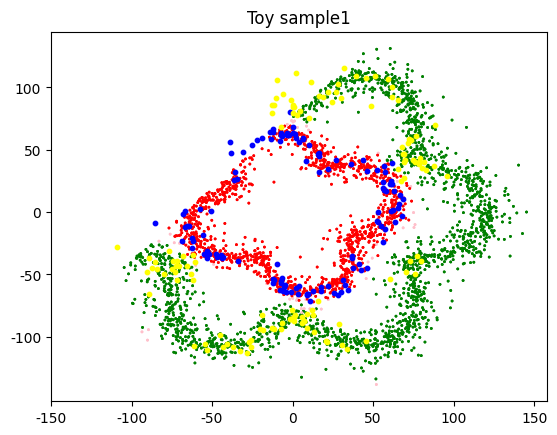

In [40]:
clr = [['red', 'pink'], ['pink', 'green']]
plt.scatter(X_sub[:, 0], X_sub[:, 1], c=[clr[int(tru)][int(prd)] for tru, prd in zip(Y_sub, prd)], s=1)
plt.scatter(X_sub[:, 0], X_sub[:, 1], c=[clr[int(tru)][int(prd)] for tru, prd in zip(Y_sub, prd)], s=1)
plt.scatter(suppvs_0[:, 0], suppvs_0[:, 1], c="blue", s=10)
plt.scatter(suppvs_1[:, 0], suppvs_1[:, 1], c="yellow", s=10)
x = [-150, -100, -50, 0, 50, 100, 150]
y = [-100, -50, 0, 50, 100]
# create an index for each tick position
xi = list(range(len(x)))
plt.xticks(x, x)
plt.yticks(y, y)
plt.title("Toy sample1")
# plt.title("Toy sample2")
# plt.savefig("toy-samp2.png")
plt.show()

In [41]:
external_X = tf.cast(test_X, tf.float32)
external_Y = test_Y
external_X = (external_X-mu_x)/sigma_x

X_sub, X_ids = project_and_filter(external_X, random_dirs[sample], 75)
Y_sub = external_Y[X_ids]
prd = softmax(get_rand_feats(X_sub, model), betas[sample])

np.mean(prd == Y_sub)

0.7515942028985507

In [42]:
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=5, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

In [43]:
y_colors = np.array(['red', 'green'])[Y_sub]

In [44]:


import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from matplotlib import ticker

from sklearn import datasets, manifold



In [45]:

md_scaling = manifold.MDS(
    n_components=2,
    max_iter=50,
    n_init=4,
    random_state=0,
)
S_scaling = md_scaling.fit_transform(get_rand_feats(X_sub, model))

plot_2d(S_scaling, y_colors, "Multidimensional scaling")

KeyboardInterrupt: 

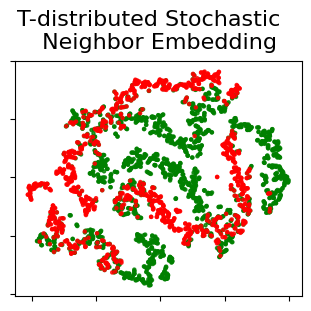

In [44]:
t_sne = manifold.TSNE(
    n_components=2,
    perplexity=15,
    init="random",
    n_iter=1000,
    random_state=0,
)
S_t_sne = t_sne.fit_transform(get_rand_feats(X_sub, model))

plot_2d(S_t_sne, y_colors, "T-distributed Stochastic  \n Neighbor Embedding")

## Should test Betas performance first

In [203]:
from tensorflow.keras import layers, models

beta_dim = betas.shape[-1]
input_dir_dim = random_dirs.shape[-1]
latent_dim = 16

# Encoder
# beta_input = layers.Input(shape=(beta_dim,))
dir_input = layers.Input(shape=(input_dir_dim,))
encoder_inputs = layers.Concatenate()([dir_input])
# x = layers.Dense(512, activation=tf.nn.elu)(encoder_inputs)
# x = layers.Dense(256, activation=tf.nn.elu)(x)
# x = layers.Dense(128, activation=tf.nn.elu)(x)
x = layers.Dense(64, activation=tf.nn.elu)(encoder_inputs)
x = layers.Dense(32, activation=tf.nn.elu)(x)
x = layers.Dense(16, activation=tf.nn.elu)(x)
x = layers.Dense(latent_dim, activation=tf.nn.elu)(x)
# z_mean = layers.Dense(latent_dim)(x)
# z_log_var = layers.Dense(latent_dim)(x)

def sampling(args):
  z_mean, z_log_var = args
  eps = tf.random.normal(shape=tf.shape(z_mean))
  return z_mean + tf.exp(0.5 * z_log_var) * eps

# z = layers.Lambda(sampling)([z_mean, z_log_var])
z = layers.Dense(latent_dim)(x)


### Using direction in Decoder is weird
### Likely just train VAE solely on betas with directions


# Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
# decoder_dir_input = layers.Input(shape=(input_dir_dim,))
decoder_inputs = layers.Concatenate()([latent_inputs])
x = layers.Dense(16, activation=tf.nn.elu)(decoder_inputs)
x = layers.Dense(32, activation=tf.nn.elu)(x)
x = layers.Dense(64, activation=tf.nn.elu)(x)
# x = layers.Dense(64, activation=tf.nn.elu)(x)
# x = layers.Dense(256, activation=tf.nn.elu)(decoder_inputs)
# x = layers.Dense(512, activation=tf.nn.elu)(x)
beta_output = layers.Dense(beta_dim)(x)

# Instantiate model
encoder = models.Model([dir_input], z, name="encoder")
decoder = models.Model([latent_inputs], beta_output, name="decoder")

# VAE
outputs = decoder([encoder([dir_input])])
vae = models.Model([dir_input], outputs, name="autoenc")
vae.encoder = encoder
vae.decoder = decoder

In [ ]:
vae.save_weights('./checkpoints/my_checkpoint')

NameError: name 'vae' is not defined

In [ ]:
vae.load_weights('./checkpoints/my_checkpoint')

In [ ]:
!zip -r checkpoints-toy.zip checkpoints/

  adding: checkpoints/ (stored 0%)
  adding: checkpoints/my_checkpoint.data-00000-of-00001 (deflated 10%)
  adding: checkpoints/my_checkpoint.index (deflated 59%)
  adding: checkpoints/checkpoint (deflated 49%)


In [204]:
def get_margin_batched(supp_vs, wgts):
  sd = (tf.concat([tf.ones((*supp_vs.shape[:-1], 1)), supp_vs], axis=-1) @ wgts[:, :, None]) * 1.0
  return sd[:]

In [205]:
# (get_margin(get_rand_feats(tf.cast(suppvs_0, dtype=tf.float32), model), betas[sample]), y_supp_0)
# # loss_2 = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# print(loss_2(y_supp_0[:len(suppvs_0)], get_margin(get_rand_feats(tf.cast(suppvs_0, dtype=tf.float32), model), betas[sample])))

def vae_loss(inputs, outputs, supp_vs, supp_ys, reg=1.0, regr=1.0):
  # recon_loss = tf.reduce_mean(tf.reduce_sum(tf.square(inputs - outputs), axis=-1))
  recon_loss = tf.reduce_mean(1-tf.reduce_sum(tf.linalg.normalize(tf.cast(inputs, dtype=tf.float32), axis=-1)[0] *
                                              tf.linalg.normalize(outputs, axis=-1)[0], axis=-1))
  # print(supp_vs.shape, outputs.shape)
  supp_margins = get_margin_batched(supp_vs, outputs)
  supp_loss = loss_2(supp_ys, supp_margins)
  # print(supp_ys[0][30:], supp_margins[0][30:])
  # print(supp_margins.shape, supp_ys.shape)
  # kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1))
  total_loss = reg * recon_loss + regr * supp_loss
  return total_loss, reg*recon_loss, regr*supp_loss

In [206]:
opt = tf.keras.optimizers.Adam()


def train_step(model, inputs, dir_inputs, supp_vs, supp_ys, alpha, ralpha=1.0):
  with tf.GradientTape() as tape:
    z = model.encoder([dir_inputs])
    outputs = model.decoder([z])
    total_loss, recon_loss, supp_loss = vae_loss(inputs, outputs, supp_vs, supp_ys, alpha, ralpha)
  grads = tape.gradient(total_loss, model.trainable_variables)
  opt.apply_gradients(zip(grads, model.trainable_variables))
  return total_loss, recon_loss, supp_loss

In [207]:
def batch(X, betas, dirs, supps, batch_size, support_batch_size):
  num_samples = betas.shape[0]
  indices = np.arange(num_samples)
  np.random.shuffle(indices)
  betas = np.array(betas)[indices]
  dirs = np.array(dirs)[indices]
  supps_ = [supps[i] for i in indices]
  supps_ = np.array([np.stack([i[np.random.choice(len(i), support_batch_size)],
                     j[np.random.choice(len(j), support_batch_size)]], axis=0) for i, j in supps_])
  def supp_get_vs(_supps):
      supps_0, supps_1 = np.transpose(_supps, (1, 0, 2, 3))
      suppvs_0 = X[supps_0.reshape((-1,))]
      suppvs_1 = X[supps_1.reshape((-1,))]
      suppvs_0 = tf.reshape(get_rand_feats(tf.cast(suppvs_0, dtype=tf.float32), model), (batch_size, support_batch_size, -1))
      suppvs_1 = tf.reshape(get_rand_feats(tf.cast(suppvs_1, dtype=tf.float32), model), (batch_size, support_batch_size, -1))
      y_supp_0 = Y[supps_0.reshape((-1,))].reshape((batch_size, support_batch_size, -1))
      y_supp_1 = Y[supps_1.reshape((-1,))].reshape((batch_size, support_batch_size, -1))
      return np.concatenate([suppvs_0, suppvs_1], axis=1), np.concatenate([y_supp_0, y_supp_1], axis=1)
  for i in range(0, betas.shape[0], batch_size):
    yield betas[i:i+batch_size], dirs[i:i+batch_size], *supp_get_vs(supps_[i:i+batch_size])

In [208]:
epochs = 2000
fine_tune_epochs = 3
batch_size = 8
support_batch_size = 150
alpha0 = 2
nalpha = alpha0
for i in range(epochs):
  nalpha = min(nalpha * 1.01, 30)
  print(f"Epoch {i}")
  for step, (batch_betas, batch_dirs, supp_vs, supp_ys) in enumerate(batch(X, betas[:32], random_dirs[:32], supps_b[:32], batch_size, support_batch_size)):
    # print(supp_vs.shape, supp_ys.shape)
    loss_vals = train_step(vae, batch_betas, batch_dirs, supp_vs, supp_ys, nalpha, 1.0)
    if step % 100 == 0: # tmp
      print(f"Step {step}: loss = {loss_vals[0].numpy()}, recon loss = {loss_vals[1].numpy()}, supp loss = {loss_vals[2].numpy()}")
    for j in range(fine_tune_epochs):
        loss_vals = train_step(vae, batch_betas, tf.linalg.normalize(batch_dirs + np.random.randn(*batch_dirs.shape)*0.1, axis=-1)[0], supp_vs, supp_ys, 1.0, 2.0)
    if step % 100 == 0: # tmp
      print(f"Step {step}: loss = {loss_vals[0].numpy()}, recon loss = {loss_vals[1].numpy()}, supp loss = {loss_vals[2].numpy()}")
  print()

Epoch 0
Step 0: loss = 70.8089370727539, recon loss = 2.1642537117004395, supp loss = 68.64468383789062
Step 0: loss = 51.780521392822266, recon loss = 0.9765028357505798, supp loss = 50.804019927978516

Epoch 1
Step 0: loss = 7.252460479736328, recon loss = 1.5533220767974854, supp loss = 5.699138164520264
Step 0: loss = 8.045106887817383, recon loss = 0.6896778345108032, supp loss = 7.355429172515869

Epoch 2
Step 0: loss = 2.9172120094299316, recon loss = 1.2169688940048218, supp loss = 1.7002429962158203
Step 0: loss = 2.9251997470855713, recon loss = 0.5804632306098938, supp loss = 2.3447365760803223

Epoch 3
Step 0: loss = 2.224482536315918, recon loss = 1.1201097965240479, supp loss = 1.1043726205825806
Step 0: loss = 2.5260095596313477, recon loss = 0.5234674215316772, supp loss = 2.00254225730896

Epoch 4
Step 0: loss = 1.4695870876312256, recon loss = 0.9228366613388062, supp loss = 0.5467504858970642
Step 0: loss = 1.4873217344284058, recon loss = 0.43030962347984314, supp l

KeyboardInterrupt: 

In [202]:
1.01**300

19.78846626192444

In [1]:
mgns = np.array([[ 0.08995201], [-1.1334991 ], [-0.70692503], [-0.38700718], [ 0.5677118 ], [ 0.01707119], [-0.48715714], [-0.5596267 ], [ 0.22097269], [-0.57446826], [-0.862669  ], [-0.6796471 ], [ 0.23565988], [ 0.23698509], [-0.49622265], [-0.29971486], [-0.49622265], [-0.49622265], [ 1.1249352 ], [ 0.76724946], [ 0.24266881], [-1.9033227 ], [ 1.1249352 ], [-0.08539084], [-0.9893254 ], [-0.9405016 ], [ 0.3633032 ], [-1.836024  ], [-0.6231923 ], [-0.18999296], [ 0.89069945], [-0.03760376], [-0.14066231], [ 0.13058978], [-0.2839343 ], [-0.6231923 ], [-1.9114025 ], [ 0.02007889], [-0.6231923 ], [-0.44188303], [ 0.23565988], [ 0.46744713], [ 0.06224036], [ 0.7398792 ], [-0.3238587 ], [ 0.50761056], [-0.5885894 ], [ 0.4163871 ], [-0.2839343 ], [-0.6989446 ]])
y_sp = np.array([[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]])
loss_2(y_sp, mgns) * 0.05

NameError: name 'np' is not defined

In [ ]:
# check agreement between vae and training samples
from sklearn.metrics import jacard_score
def agreement(y_pred1, y_pred2, y_true):
    tp1 = np.float32() * 
    tp1 = np.float32() * 
    tp1 = np.float32() * 
    tp1 = np.float32() * 

    tp1 = np.float32() * 
    tp1 = np.float32() * 
    tp1 = np.float32() * 
    tp1 = np.float32() * 

    

In [68]:
# Dont really think this works, since the latent space should be conditioned on the direction
# Just to try something
# Likely better to just have VAE solely on betas w/o directions
# def generate_new_betas(model, num_samples=1):
#   random_dirs = np.random.randn(num_samples, d)
#   random_dirs = random_dirs / np.linalg.norm(random_dirs, axis=1, keepdims=True)
#   random_dirs = tf.constant(random_dirs)
#   latent_samples = tf.random.normal(shape=(num_samples, latent_dim))
#   return model.decoder([latent_samples, random_dirs])

# def generate_new_betas(model, num_samples=1):
#   random_dirs1 = np.random.randn(num_samples, d)
#   random_dirs2 = np.random.randn(num_samples, d)
#   random_dirs1 = random_dirs1 / np.linalg.norm(random_dirs1, axis=1, keepdims=True)
#   random_dirs1 = tf.constant(random_dirs1)
#   random_dirs2 = random_dirs2 / np.linalg.norm(random_dirs2, axis=1, keepdims=True)
#   random_dirs2 = tf.constant(random_dirs2)
#   latent_samples1 = tf.random.normal(shape=(num_samples, latent_dim))    
#   latent_samples2 = tf.random.normal(shape=(num_samples, latent_dim))
#   return model.decoder([latent_samples1, random_dirs1]), random_dirs1, model.decoder([latent_samples2, random_dirs1])


def generate_new_samples(model, num_samples=1):
  random_dirs = np.random.randn(num_samples, d)
  random_dirs = random_dirs / np.linalg.norm(random_dirs, axis=1, keepdims=True)
  random_dirs = tf.constant(random_dirs)
  z = model.encoder([random_dirs])
  outputs = model.decoder([z])
  return outputs, random_dirs

In [213]:
drawn_betas, drawn_random_dirs = generate_new_samples(vae, 50_000)
# drawn_betas = generate_new_betas(vae, 50_000)

In [209]:
z = vae.encoder([tf.linalg.normalize(random_dirs + np.random.randn(*random_dirs.shape)*0.1)[0]])
outputs = vae.decoder([z])

In [210]:
outputs[0], betas[0]

(<tf.Tensor: shape=(121,), dtype=float32, numpy=
 array([ 1.00234914e+00,  5.54567948e-03,  2.10365299e-02,  1.83927510e-02,
        -2.20863335e-02,  9.82964709e-02,  2.95016579e-02,  4.00580205e-02,
        -1.76283401e-02,  7.78403413e-03,  5.98009154e-02,  1.08970655e-02,
        -1.08468533e-02, -1.25745125e-02, -1.28582194e-02, -1.01278335e-01,
         2.03390345e-02, -3.03526260e-02,  1.88789833e-02,  9.31526124e-02,
         4.18124795e-02,  7.06626326e-02, -5.76057099e-02,  2.70075686e-02,
         7.00379908e-02, -1.06998391e-01, -2.21368670e-03,  4.04415838e-03,
        -4.68033217e-02,  1.52117442e-02,  6.67533726e-02, -1.88224204e-02,
        -2.65055895e-02, -3.10670529e-02, -4.39387783e-02,  2.22956434e-01,
        -1.37458146e-02, -4.08294387e-02, -2.41565388e-02,  2.99811065e-02,
         2.33807355e-01, -6.75648600e-02,  1.77419372e-02, -1.45412218e-02,
         5.03887981e-03, -2.21002638e-01,  6.08768128e-03, -4.38787937e-02,
         3.41338031e-02,  1.50485337e-0

In [211]:
tf.losses.CosineSimilarity()(outputs[100], tf.cast(betas[100], dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=-0.5556117>

In [134]:
drawn_betas = generate_new_betas(vae, 50_000)

NameError: name 'generate_new_betas' is not defined

In [78]:
model = define_rand_feats(X, 2)
model.Ws = tf.constant(np.load(f'Ws.npy').astype(np.float32))

In [84]:
external_X = tf.cast(test_X, tf.float32)
external_Y = test_Y
external_X = (external_X-mu_x)/sigma_x

In [38]:
pperm = np.random.permutation(len(external_X))

external_X = tf.constant(np.array(external_X)[pperm])
external_Y = external_Y[pperm]

In [85]:
external_randfeats_X = get_rand_feats(external_X, model)

In [75]:
print(external_X[0])
print(external_randfeats_X[0][:10])
print(external_Y[0])

tf.Tensor([-69.249535 -62.7964  ], shape=(2,), dtype=float32)
tf.Tensor(
[-0.53246677 -0.6224173  -0.7500553  -0.96449435  0.494363   -0.22940174
  0.98979336 -0.76833683  0.28031394  0.996387  ], shape=(10,), dtype=float32)
1


In [ ]:
print(external_X.shape)
print(external_randfeats_X.shape)
print(external_Y.shape)

(24599, 2048)
(24599, 1000)
(24599,)


In [ ]:
print(external_X[:10])
print(external_Y[:10])

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10, 2048), dtype=float32)
tf.Tensor([1 1 1 1 1 1 1 1 1 1], shape=(10,), dtype=int64)


In [80]:
def get_preds(randfeats, betas):
  """
  Args:
    randfeats: N x d
    betas: M x d
  Return:
    preds: N x M - each beta predicts on each instance
  """
  #preds = []
  #for i in range(len(betas)):
  #  if i % 25_000 == 0: print(f"{i} Predictions Made")
  #  preds.append(np.matmul(randfeats, betas[i]))
  #return np.array(preds)
  sd = (1 / (1 + np.exp(-np.concatenate([np.ones((randfeats.shape[0], 1)), randfeats], axis=-1) @ betas.numpy().T)))
  return sd[:]

  # betaT = np.transpose(betas) # d x M
  # preds = np.matmul(randfeats, betaT) # N x M
  # return preds

def aggregate_preds(preds):
  # mean_pred = np.mean(preds, axis=-1, keepdims=False)
  mean_pred = np.sum(preds, axis=-1, keepdims=False)
  std_pred = np.std(preds, axis=-1, keepdims=False)
  # Typically 0.5 threshold, just was all 0s
  return np.float32(mean_pred), np.float32(mean_pred), np.float32(std_pred)

def get_preds_and_aggregate_sorted(randfeats, eX, dirs, betas):
  preds = get_preds(randfeats, betas)
  projs = np.dot(tf.linalg.normalize(eX, axis=-1)[0], tf.transpose(tf.linalg.normalize(dirs, axis=-1)[0]))
  print(projs.shape, preds.shape)
  thresh = np.percentile(projs, 100 - 25, axis=-1)
  # wghts = (projs > thresh[:, None]) * projs
  # wghts = np.ones_like(projs > thresh[:, None])
  wghts = (projs > thresh[:, None]).astype(np.float64)
  wghts /= np.sum(wghts, axis=-1, keepdims=True)
  return aggregate_preds(preds * wghts)

def get_preds_and_aggregate(randfeats, betas):
  preds = get_preds(randfeats, betas)
  return *aggregate_preds(preds), preds

# ext_preds, mp_rand, sp_rand = get_preds_and_aggregate_sorted(external_randfeats_X, external_X, dir1, drawn_betas) # 0.622

ext_probs, mp_rand, sp_rand = get_preds_and_aggregate_sorted(external_randfeats_X, external_X, random_dirs, betas) # 0.622
# ext_probs, mp_rand, sp_rand = get_preds_and_aggregate_sorted(external_randfeats_X, external_X, drawn_random_dirs, drawn_betas) # 0.622

# ext_probs, mp_rand, sp_rand, pred = get_preds_and_aggregate(external_randfeats_X, betas)
# ext_probs, mp_rand, sp_rand, pred = get_preds_and_aggregate(external_randfeats_X, drawn_betas)
# ext_preds, mp_rand, sp_rand, preds = get_preds_and_aggregate(external_randfeats_X, betas)
# ext_preds, mp_rand, sp_rand, preds = get_preds_and_aggregate(external_randfeats_X, betas[:30])
# ext_preds, mp_rand, sp_rand = get_preds_and_aggregate_sorted(external_randfeats_X, external_X, drawn_random_dirs, drawn_betas)
# ext_preds, mp_rand, sp_rand = get_preds_and_aggregate_sorted(external_randfeats_X, external_X, random_dirs, betas)
# ext_preds, mp_rand, sp_rand = get_preds_and_aggregate_sorted(external_randfeats_X, external_X, random_dirs, betas)

(4600, 100) (4600, 100)


In [88]:
np.save('extern_rf_X.npy', external_randfeats_X)
np.save('extern_X.npy', external_X)
# np.save('random_d.npy', random_dirs)
# np.save('betas.npy', betas)
np.save('Y.npy', external_Y)
np.save('Ws.npy', model.Ws)

In [179]:
# check agreement between vae and training samples
from sklearn.metrics import jacard_score
def agreement(y_pred1, y_pred2, y_true):
    tp1 = np.float32(y_pred1==1) * np.float32(y_true==1)
    fp1 = np.float32(y_pred1==1) * np.float32(y_true==0)
    tn1 = np.float32(y_pred1==0) * np.float32(y_true==0)
    fn1 = np.float32(y_pred1==0) * np.float32(y_true==1)

    tp2 = np.float32(y_pred2==1) * np.float32(y_true==1)
    fp2 = np.float32(y_pred2==1) * np.float32(y_true==0)
    tn2 = np.float32(y_pred2==0) * np.float32(y_true==0)
    fn2 = np.float32(y_pred2==0) * np.float32(y_true==1)

    return jacard_score(tp1, tp2), jacard_score(fp1, fp2), jacard_score(tn1, tn2), jacard_score(fn1, fn2)

ImportError: cannot import name 'jacard_score' from 'sklearn.metrics' (/playpen/debman/ood/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [ ]:
drawn_betas[0].numpy(), betas[0].numpy()

In [ ]:
print(ext_preds.shape)

(937,)


In [134]:
print(ext_preds)

[0. 0. 0. ... 0. 0. 0.]


In [138]:
len(ext_preds), external_X.shape

(4600, TensorShape([4600, 2]))

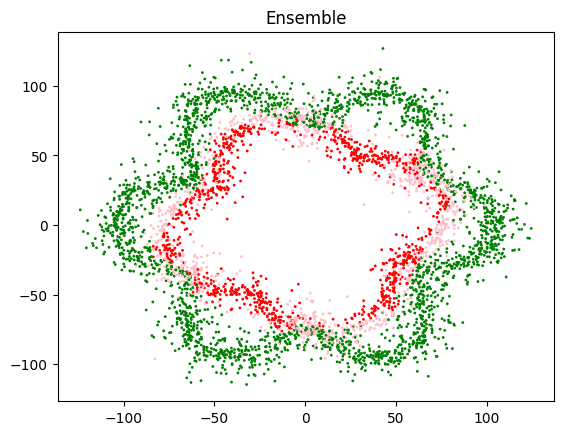

In [217]:
import matplotlib.pyplot as plt
clr = [['red', 'pink'], ['pink', 'green']]
plt.scatter(external_X[:, 0], external_X[:, 1], c=[clr[int(tru)][int(prd)] for tru, prd in zip(external_Y, np.float32(ext_probs > 0.5))], s=1)
plt.title('Ensemble')
plt.savefig('ensemble.png')
# plt.scatter(external_X[:, 0], external_X[:, 1], c=[clr[int(tru)][int(prd)] for tru, prd in zip(external_Y, pred[:, 800])], s=1)
# plt.scatter(external_X[:, 0], external_X[:, 1], c=[clr[int(tru)][int(prd)] for tru, prd in zip(external_Y, np.mean(pred, axis=-1)>0.5)], s=1)

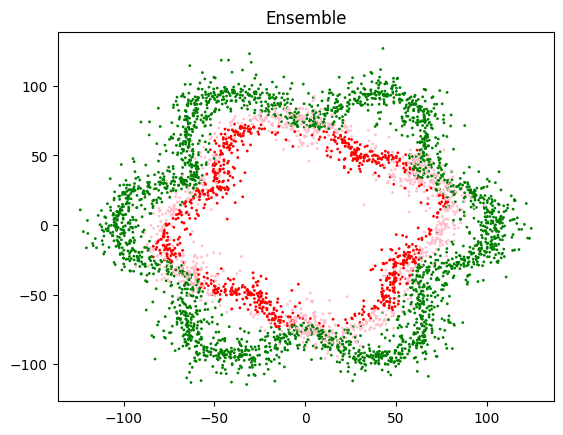

In [157]:
import matplotlib.pyplot as plt
clr = [['red', 'pink'], ['pink', 'green']]
plt.scatter(external_X[:, 0], external_X[:, 1], c=[clr[int(tru)][int(prd)] for tru, prd in zip(external_Y, np.float32(ext_probs > 0.5))], s=1)
plt.title('Ensemble')
plt.savefig('ensemble.png')
# plt.scatter(external_X[:, 0], external_X[:, 1], c=[clr[int(tru)][int(prd)] for tru, prd in zip(external_Y, pred[:, 800])], s=1)
# plt.scatter(external_X[:, 0], external_X[:, 1], c=[clr[int(tru)][int(prd)] for tru, prd in zip(external_Y, np.mean(pred, axis=-1)>0.5)], s=1)

In [136]:
np.mean(pred, axis=-1), ext_probs

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.00187107, 0.00096595, 0.16303205, ..., 0.00499356, 0.01134013,
        0.00106441], dtype=float32))

In [81]:
ext_preds = np.float32(ext_probs > 0.5)
print("First 10 Predictions: ", ext_preds[:10])
print("Total Positive Preds: ", sum(ext_preds))
print("Total Preds: ", len(ext_preds))
print("% Positive Preds: ", sum(ext_preds) / len(ext_preds))
print()
print("First 10 Ground Truth: ", external_Y[:10])
print("Total Positive Ground Truth: ", sum(external_Y))
print("Total Ground Truth: ", len(external_Y))
print("% Positive Ground Truth: ", sum(external_Y) / len(external_Y))
print()
print("Accuracy: ", sum(ext_preds == external_Y) / len(ext_preds))

First 10 Predictions:  [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
Total Positive Preds:  3483.0
Total Preds:  4600
% Positive Preds:  0.7571739130434783

First 10 Ground Truth:  [1 1 1 1 1 1 1 1 1 1]
Total Positive Ground Truth:  3000
Total Ground Truth:  4600
% Positive Ground Truth:  0.6521739130434783

Accuracy:  0.7554347826086957


/tmp/ipykernel_2585826/2574676416.py:9: RuntimeWarning: invalid value encountered in true_divide
  precision = [tp/(tp+fp) for tp, fp in zip(tps, fps)]


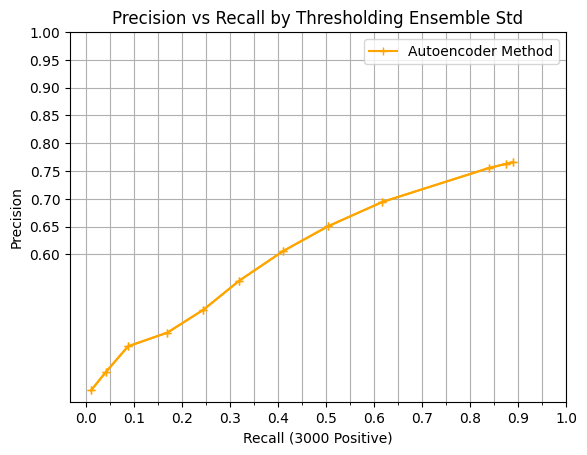

In [152]:
threshs = sp_rand
std_threshs = np.linspace(np.min(threshs), np.max(threshs), 20) # Diff std. dev. thresholds (20 of them in this case)
reject_rate = [1 - np.mean((threshs<=s)) for s in std_threshs] # Portion of instances rejected @ each std threshold
accus = [np.mean((ext_preds==external_Y)[(threshs<=s)]) for s in std_threshs] # Acc @ each std thresh.
tps = [np.sum(((external_Y)*(ext_preds==external_Y))[(threshs<=s)]) for s in std_threshs]  # correct and positive
fps = [np.sum(((ext_preds)*(ext_preds!=external_Y))[(threshs<=s)]) for s in std_threshs]  # incorrect and predicted positive
pos = np.sum(external_Y)
recall = [tp/pos for tp in tps]
precision = [tp/(tp+fp) for tp, fp in zip(tps, fps)]
plt.plot(recall, precision, marker='+', c='orange')

plt.plot(recall, precision, marker='+', c='orange')
plt.xticks(np.arange(0, 1.01, step=0.1))
plt.xticks(np.arange(0, 1.01, step=0.05), minor=True)
plt.yticks(np.arange(.6, 1.01, step=0.05))
plt.grid(True, which='both')
plt.xlabel('Recall ({} Positive)'.format(int(pos)))
plt.ylabel('Precision')
plt.title('Precision vs Recall by Thresholding Ensemble Std')
plt.legend(['Autoencoder Method'])

PR AUC (<0.1R):  0.09904745896046663
PR AUC (<0.2R):  0.1966569845656947


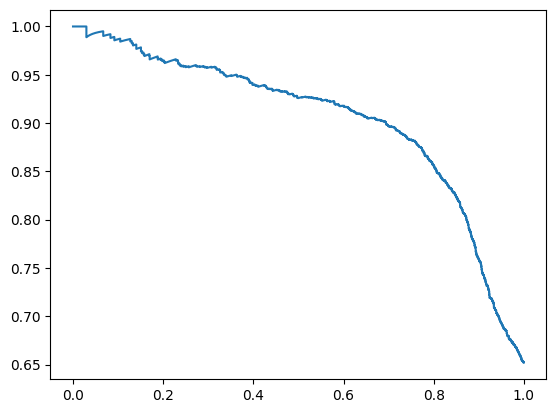

In [60]:
from sklearn.metrics import precision_recall_curve, auc
p, r, thres = precision_recall_curve(external_Y, ext_probs)

plt.plot(r, p)
print("PR AUC (<0.1R): ", auc(r[r<0.1], p[r<0.1]))
print("PR AUC (<0.2R): ", auc(r[r<0.2], p[r<0.2]))

In [96]:
auc(r[r<0.2], p[r<0.2]) / np.max(r[r<0.2])

0.9849264669400403

In [95]:
r[r<0.2], p[r<0.2]

(array([0.19966667, 0.19933333, 0.199     , 0.19866667, 0.19833333,
        0.198     , 0.19766667, 0.19766667, 0.19733333, 0.197     ,
        0.19666667, 0.19633333, 0.196     , 0.19566667, 0.19533333,
        0.195     , 0.19466667, 0.19433333, 0.19433333, 0.194     ,
        0.19366667, 0.19333333, 0.193     , 0.19266667, 0.19233333,
        0.192     , 0.19166667, 0.19133333, 0.191     , 0.19066667,
        0.19033333, 0.19      , 0.18966667, 0.18933333, 0.189     ,
        0.18866667, 0.18833333, 0.188     , 0.188     , 0.18766667,
        0.18766667, 0.18733333, 0.187     , 0.18666667, 0.18633333,
        0.186     , 0.18566667, 0.18533333, 0.185     , 0.18466667,
        0.18433333, 0.184     , 0.18366667, 0.18333333, 0.183     ,
        0.18266667, 0.18233333, 0.182     , 0.18166667, 0.18133333,
        0.181     , 0.18066667, 0.18033333, 0.18      , 0.17966667,
        0.17933333, 0.179     , 0.17866667, 0.17833333, 0.178     ,
        0.17766667, 0.17733333, 0.177     , 0.17

In [69]:
from sklearn.metrics import roc_auc_score, roc_curve
print("AUROC: ", roc_auc_score(external_Y, ext_probs))

AUROC:  0.8335608333333333


In [90]:
m = tf.keras.metrics.AUC(curve='PR')
m.update_state(r, p)
# threshold values are [0 - 1e-7, 0.5, 1 + 1e-7]
# tp = [2, 1, 0], fp = [2, 0, 0], fn = [0, 1, 2], tn = [0, 2, 2]
# tp_rate = recall = [1, 0.5, 0], fp_rate = [1, 0, 0]
# auc = ((((1 + 0.5) / 2) * (1 - 0)) + (((0.5 + 0) / 2) * (0 - 0)))
#     = 0.75
m.result()


<tf.Tensor: shape=(), dtype=float32, numpy=0.99893653>

In [66]:
fpr, tpr, _ = roc_curve(external_Y, ext_probs)

NameError: name 'roc_curve' is not defined

In [ ]:
print(accus)

[0.0, 0.5, 0.4738372093023256, 0.4956921309592188, 0.49409681227863045, 0.49305069493050696, 0.4944530357022793, 0.49494787489975944, 0.49523989958793163, 0.49640065362363645, 0.4956647398843931, 0.4954388303411505, 0.4954494914137462, 0.49574293900941463, 0.4954910841800302, 0.4957665065537735, 0.49576926206167116, 0.49581164606376055, 0.4957713263397577, 0.49579251189072726]
